# Brain Tumor Classification based on MRI Scan of the brain 

 A brain tumor is an abnormal growth of cells within or around the brain. These tumors can develop from the brain's own tissues, surrounding structures like the meninges or cranial nerves, or as a result of cancer spreading from other parts of the body (metastasis).  
 
The link for the dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri



## Types of Brain Tumors to be classified 

### Glioma Tumor
 Gliomas are tumors that arise from the glial cells in the brain or spinal cord. Glial cells provide structural and functional support for neurons. 
 
### Meningioma Tumor
Meningiomas are tumors that originate in the meninges, the protective membranes surrounding the brain and spinal cord. They are the most common type of primary brain tumor. 

###  Pituitary Tumor
Pituitary tumors develop in the pituitary gland, a small, pea-shaped gland at the base of the brain that regulates hormones. 







In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

## Importing The Required Libraries

In [19]:

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf 

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score 

## Structuring The Dataset 


- The datset is given in two folders Training and Testing .
- Each Training and Testing contains four different subfolders glioma_tumor,meningioma_tumor,pirtuary_tumor,no_tumor.Each of these folders contains the images of the respective MRI scan of brain. 

- The train and test data are combined which will be split further with train test split.The images data is converted to array and stored in X_train variable and their corresponding labels of images are stored in Y_train.

In [15]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train) 

## Shuffling the Data and Splitting the Data into Train and Test


- We can see the data consists of 3264 image files where each image is having dimension of 150x150x3 

In [16]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((2937, 150, 150, 3), (327, 150, 150, 3), (2937,), (327,))

## Visualizing The MRI scan of 9 different samples.

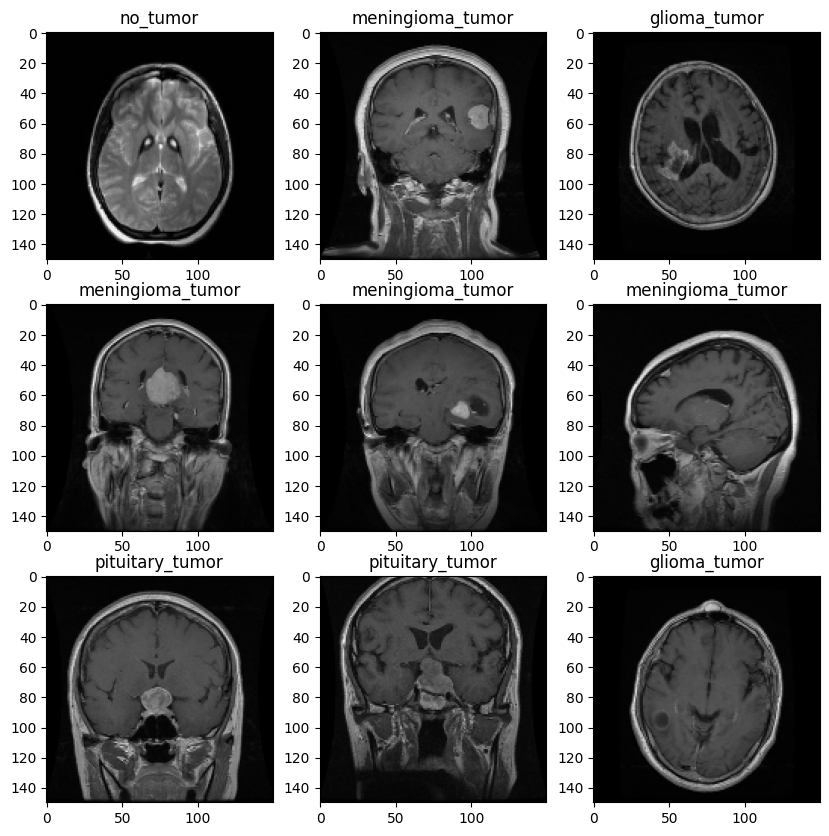

In [20]:
plt.figure(figsize=(10,10))
for i in range(1,10):
         x=np.random.randint(1,2000)
         plt.subplot(3,3,i)
         plt.imshow(X_train[x],cmap="gray")
         plt.title(y_train[x]) 

## Converting The Target Variable in Train and Test to One Hot Encoding 

In [22]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test) 

In [23]:
y_train.shape,y_test.shape 

((2937, 4), (327, 4))

### Building Compiling and Training The Model 

In [24]:
# building a CNN model inspired by VGG16
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax')) 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.2704 - loss: 3.2528 - val_accuracy: 0.2789 - val_loss: 1.3626
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2787 - loss: 1.3626 - val_accuracy: 0.2721 - val_loss: 1.3620
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3091 - loss: 1.3396 - val_accuracy: 0.3537 - val_loss: 1.3766
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4187 - loss: 1.2602 - val_accuracy: 0.4354 - val_loss: 1.2593
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5531 - loss: 1.0564 - val_accuracy: 0.5408 - val_loss: 1.0377
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6243 - loss: 0.8561 - val_accuracy: 0.5102 - val_loss: 1.1499
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6573 - loss: 0.7908 - val_accuracy: 0.6667 - val_loss: 0.7740
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6932 - loss: 0.7240 - val_accuracy: 0.6599 -

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

## Evaluating The Model's Performance Across The Epochs 

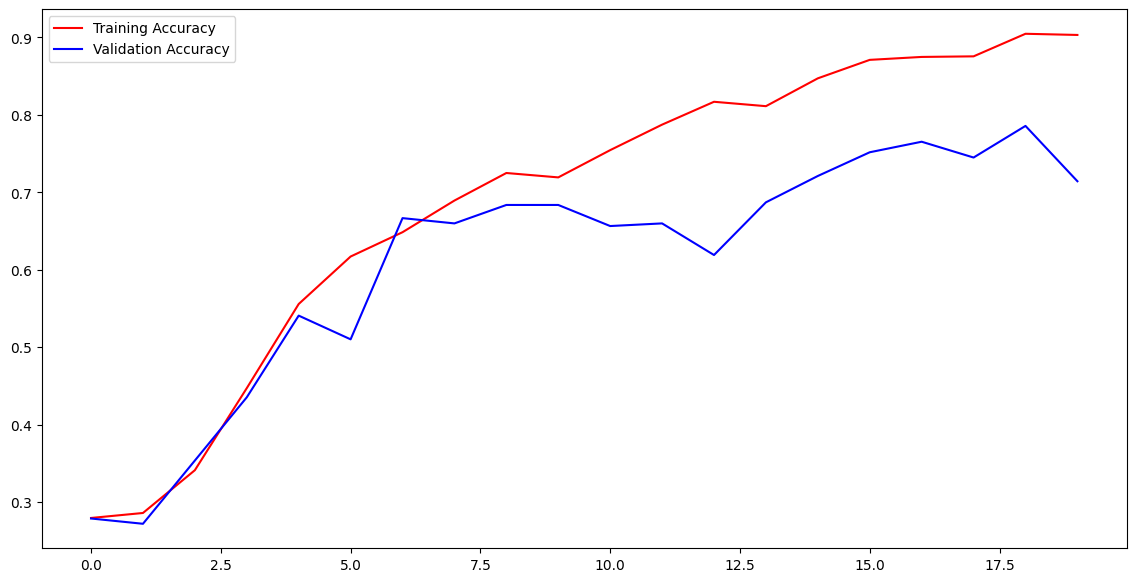

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show() 

- The red line (training accuracy) shows a consistent upward trend, indicating that the model is learning and fitting well to the training data as the epochs progress. 
- By the final epochs, the training accuracy approaches 90%, suggesting the model has captured most of the patterns in the training dataset. 
- The blue line (validation accuracy) also improves initially, suggesting the model is generalizing well to unseen data during the early training stages. 


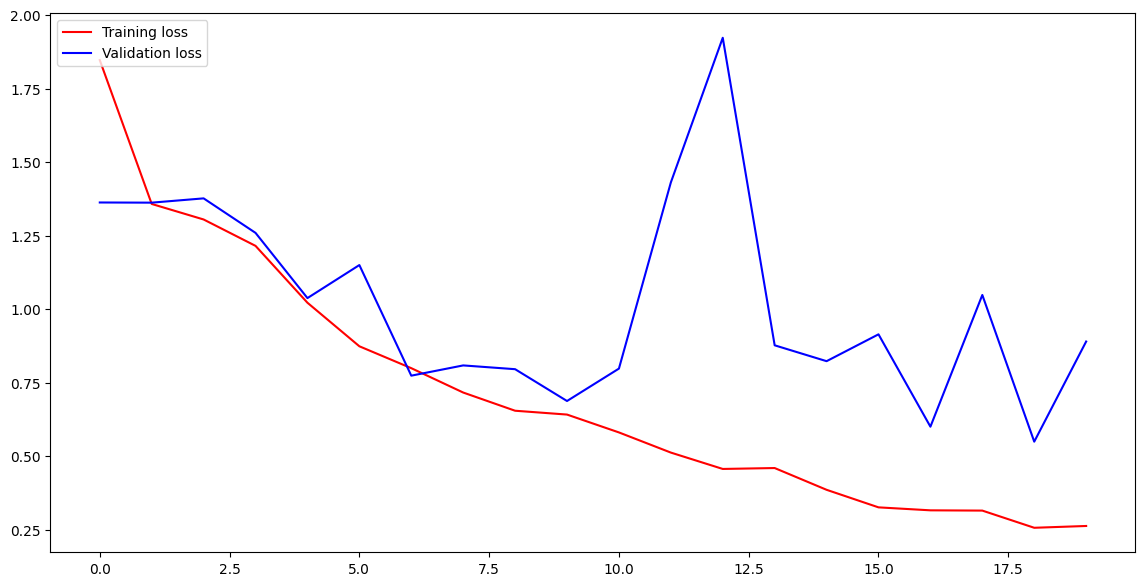

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show() 

- The red line shows a steady decrease, indicating the model is learning and fitting the training data better over time.
By the later epochs, the training loss becomes very low, which might suggest the model has learned the patterns in the training data quite well.
- The blue line shows a decrease initially, which suggests that the model was generalizing well during the early training phase.



In [31]:
predicted=model.predict(X_test)
predicted 

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


array([[4.6754698e-04, 2.6919743e-02, 6.2798156e-04, 9.7198468e-01],
       [1.4253350e-02, 4.1631734e-04, 9.8528743e-01, 4.2875676e-05],
       [9.9986064e-01, 1.3561477e-04, 1.2055882e-06, 2.5545507e-06],
       ...,
       [9.9600828e-01, 3.9700698e-03, 9.2405116e-06, 1.2336785e-05],
       [9.8580521e-01, 1.4187257e-02, 3.1656998e-06, 4.3067066e-06],
       [9.5159393e-03, 1.3461738e-03, 1.0242126e-05, 9.8912758e-01]],
      dtype=float32)

In [32]:
predict=np.argmax(predicted,axis=1)
predict 

array([3, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 0,
       0, 0, 1, 3, 2, 1, 3, 1, 0, 3, 0, 0, 3, 2, 3, 0, 0, 2, 2, 0, 3, 1,
       0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 1, 0, 0, 1, 0, 0, 3, 3,
       3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 1, 0,
       3, 3, 2, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 0, 2, 2, 0, 3, 3, 0, 0, 2,
       0, 1, 3, 0, 3, 0, 3, 3, 2, 2, 0, 0, 3, 0, 3, 3, 1, 3, 3, 0, 1, 0,
       0, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 3, 0, 0, 3,
       2, 3, 2, 1, 2, 0, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3, 2, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 1, 1, 3, 0, 2, 0, 0, 0, 1,
       3, 2, 3, 0, 3, 0, 2, 3, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 2, 3, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 3, 0,
       0, 2, 0, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 3, 0,
       0, 1, 3, 0, 2, 0, 0, 3, 3, 2, 3, 0, 3, 3, 0,

In [36]:
y_test_new 

[3,
 2,
 0,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 1,
 3,
 0,
 1,
 3,
 2,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 3,
 0,
 2,
 0,
 3,
 3,
 2,
 3,
 0,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 3,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 0,
 2,
 3,
 1,
 1,
 0,
 2,
 2,
 1,
 3,
 3,
 0,
 0,
 2,
 1,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 2,
 1,
 0,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 3,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 0,
 3,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 0,
 3,
 0,
 3,
 0,
 1,
 0,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 0,
 3,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 3,
 1,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,


accuracy :  0.6819571865443425


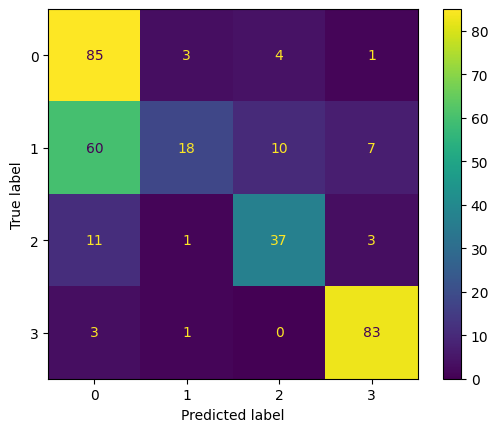

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report 
accuracy=accuracy_score(y_test_new,predict) 
print("accuracy : ",accuracy) 


cm=confusion_matrix(y_test_new,predict)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

In [47]:
print(classification_report(y_test_new,predict)) 

              precision    recall  f1-score   support

           0       0.53      0.91      0.67        93
           1       0.78      0.19      0.31        95
           2       0.73      0.71      0.72        52
           3       0.88      0.95      0.92        87

    accuracy                           0.68       327
   macro avg       0.73      0.69      0.65       327
weighted avg       0.73      0.68      0.64       327



This output shows the **classification report** for your model's predictions, which includes key metrics like **precision**, **recall**, **F1-score**, and **support** for each class. Here's a detailed explanation of the report:

---

### Key Metrics:
1. **Precision**:
   - Precision measures the proportion of correct predictions for a specific class out of all instances predicted as that class.
   - High precision indicates fewer false positives.

2. **Recall**:
   - Recall measures the proportion of correct predictions for a specific class out of all actual instances of that class.
   - High recall indicates fewer false negatives.

3. **F1-Score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balance between the two.
   - A high F1-score indicates good performance on both precision and recall.

4. **Support**:
   - Support is the number of true instances for each class in the test dataset.

---

### Per-Class Performance:
1. **Class 0**:
   - **Precision**: 0.53 (low; many false positives for this class).
   - **Recall**: 0.91 (high; most actual instances of class 0 were correctly identified).
   - **F1-Score**: 0.67 (moderate; imbalance between precision and recall).
   - The model identifies most instances of class 0 but has trouble avoiding false positives.

2. **Class 1**:
   - **Precision**: 0.78 (good; fewer false positives).
   - **Recall**: 0.19 (very low; most actual instances were missed).
   - **F1-Score**: 0.31 (poor; low recall impacts this score significantly).
   - The model struggles to identify class 1 instances correctly, with many false negatives.

3. **Class 2**:
   - **Precision**: 0.73 (moderate; good at avoiding false positives).
   - **Recall**: 0.71 (moderate; most instances identified correctly).
   - **F1-Score**: 0.72 (balanced; precision and recall are similar).
   - The model performs fairly well for class 2.

4. **Class 3**:
   - **Precision**: 0.88 (very high; very few false positives).
   - **Recall**: 0.95 (excellent; most actual instances were identified).
   - **F1-Score**: 0.92 (outstanding; strong performance overall).
   - The model performs best for class 3, with high precision, recall, and F1-score.

---

### Overall Performance:
- **Accuracy**: 0.68
  - The model correctly predicts 68% of the test samples overall.
  
- **Macro Avg**:
  - **Precision**: 0.73, **Recall**: 0.69, **F1-Score**: 0.65
  - The average metric values for all classes, treating each class equally.
  
- **Weighted Avg**:
  - **Precision**: 0.73, **Recall**: 0.68, **F1-Score**: 0.64
  - Weighted by the number of instances in each class, accounting for class imbalance.

---

### Observations:
1. **Class Imbalance**:
   - The performance varies significantly across classes, with class 3 performing best and class 1 performing worst. This might be due to class imbalance or difficulty in distinguishing certain classes.

2. **Low Recall for Class 1**:
   - The low recall for class 1 indicates the model misses many true instances of this class. This could be improved with techniques like oversampling, undersampling, or using a weighted loss function.

3. **High Precision for Class 3**:
   - The model is very confident when predicting class 3, as seen by its high precision and recall.



---

### Summary:
The model performs well for class 3 and moderately for class 2, but struggles with class 1.